# Polynomial Regression

---

# 1. from scratch with Numpy

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import logging 
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

We will implement polynomial regression step by step here without using specialized libraries (other than NumPy), in order to better understand how it works.

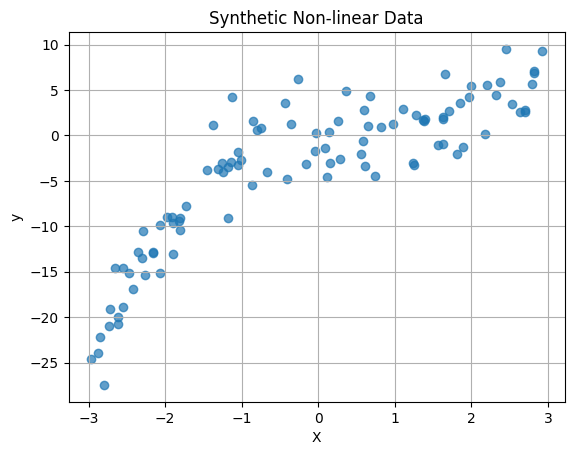

In [3]:
np.random.seed(42)

# Data generation non-linear
n_samples = 100
X = np.sort(np.random.rand(n_samples, 1) * 6 - 3, axis=0)
y = 0.5 * X**3 - X**2 + X + np.random.randn(n_samples, 1) * 3

# Data visualization
plt.scatter(X, y, alpha=0.7)
plt.title("Synthetic Non-linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

## 1.1. Creation of polynomial features

For polynomial regression, it is necessary to explicitly create variables that represent successive powers of the initial variable.

In [5]:
def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], degree + 1))
    for d in range(1, degree + 1):
        X_poly[:, d] = X[:, 0] ** d
    return X_poly

# Example with degree 3
degree = 3
X_poly = polynomial_features(X, degree)

# Printing first 5 lines to verify
print("Polynomial caracteristics (5 five first lines) :")
print(X_poly[:5])

Polynomial caracteristics (5 five first lines) :
[[  1.          -2.9668673    8.80230156 -26.11526064]
 [  1.          -2.87649303   8.27421218 -23.80071369]
 [  1.          -2.84748524   8.10817219 -23.08790063]
 [  1.          -2.79366887   7.80458577 -21.80342835]
 [  1.          -2.72863627   7.44545588 -20.31594092]]


## 1.2. Fitting a linear regression on polynomial features

Once the polynomial features are created, we simply apply a standard linear regression to determine the model coefficients.

In [6]:
# Analytical solution (énormal equation)
theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

print("Coefficients got :")
for i, coef in enumerate(theta.flatten()):
    print(f"Degree {i} : {coef:.3f}")

Coefficients got :
Degree 0 : 0.019
Degree 1 : 0.956
Degree 2 : -0.999
Degree 3 : 0.532


## 1.3. Visualization of the fitted model

We graphically plot the curve predicted by our polynomial model to visually verify its quality.

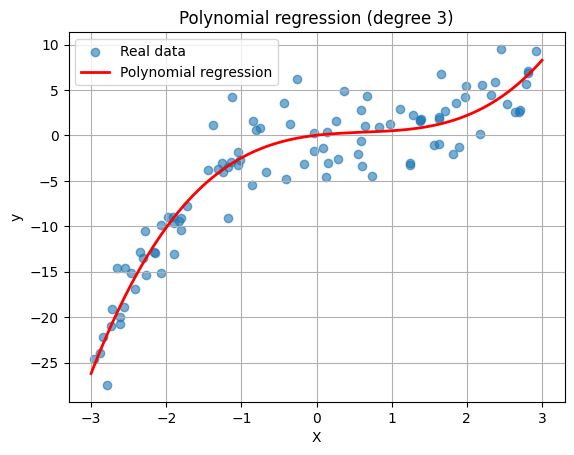

In [7]:
# Creation of a grid for smooth display
X_plot = np.linspace(-3, 3, 200).reshape(-1, 1)
X_plot_poly = polynomial_features(X_plot, degree)
y_plot = X_plot_poly @ theta

# Visualization
plt.scatter(X, y, alpha=0.6, label='Real data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial regression')
plt.title("Polynomial regression (degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## 1.4. Experiment: effect of polynomial degree

Let's try several degrees to illustrate underfitting and overfitting phenomena

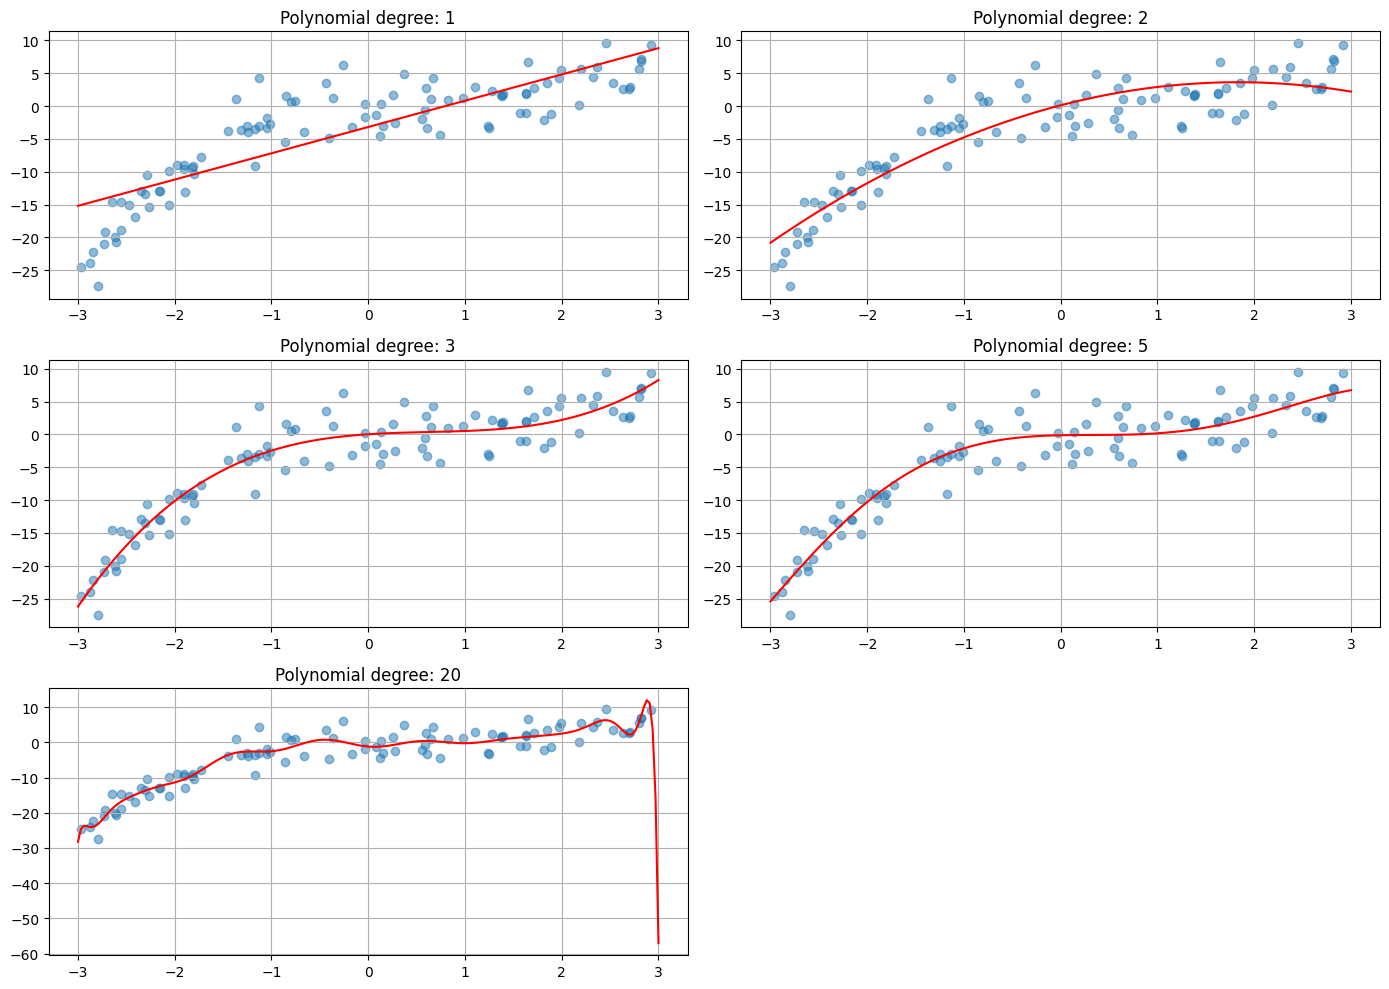

In [8]:
degrees = [1, 2, 3, 5, 20]
plt.figure(figsize=(14, 10))

for i, deg in enumerate(degrees, 1):
    # Create polynomial features and fit the model
    X_poly = polynomial_features(X, deg)
    theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    
    # Generate predictions for plotting
    X_plot_poly = polynomial_features(X_plot, deg)
    y_plot = X_plot_poly @ theta
    
    # Create subplot for each degree
    plt.subplot(3, 2, i)
    plt.scatter(X, y, alpha=0.5)
    plt.plot(X_plot, y_plot, color='red')
    plt.title(f"Polynomial degree: {deg}")
    plt.grid(True)

plt.tight_layout()
plt.show()


### What do we observe?

- A low polynomial degree can underfit the data, failing to capture the true underlying complexity.
- A too high degree can lead to overfitting: the model adapts too precisely to the training data, including noise.

### Key takeaways about polynomial regression:

- Polynomial regression is simply linear regression performed on transformed features (polynomials).
- Choosing the right degree is crucial: typically done through cross-validation or statistical criteria.


### Additional explanation:

- Underfitting (low degree): The model is too simple and fails to capture important patterns in the data
- Optimal fit (medium degree): The model captures the true underlying relationship
- Overfitting (high degree): The model becomes too complex and starts fitting noise, leading to poor generalization

---

# 2. Polynomial Regression with Scikit-learn

To capture non-linear relationships between variables, we first use the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class to create new features (powers, interactions), then fit a linear model on these new variables.

## Important Parameters of PolynomialFeatures

### `degree` (int or tuple (min_degree, max_degree), default=2)
- Defines the maximum degree of generated powers
- With an integer, all powers up to this degree are included
- Higher degrees capture more complex relationships, but beware of overfitting and computational complexity

### `interaction_only` (bool, default=False)
- If True, only interactions between different variables are created (no squares, cubes, etc.)
- Greatly reduces the number of created variables, ideal if you want to capture only cross-effects

### `include_bias` (bool, default=True)
- If True, adds a constant column (=1), acting as an intercept
- If False, no constant term is added: you'll need to explicitly use a linear model with intercept

This preprocessing step transforms your features before applying linear regression, allowing you to model non-linear relationships while still using linear regression techniques.

## 2.1. Variation des paramètres degree et interaction_only

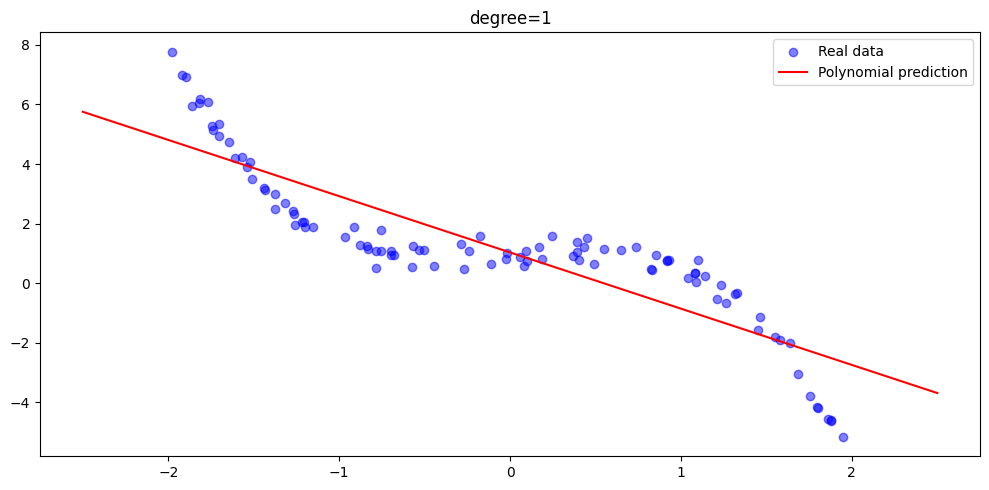

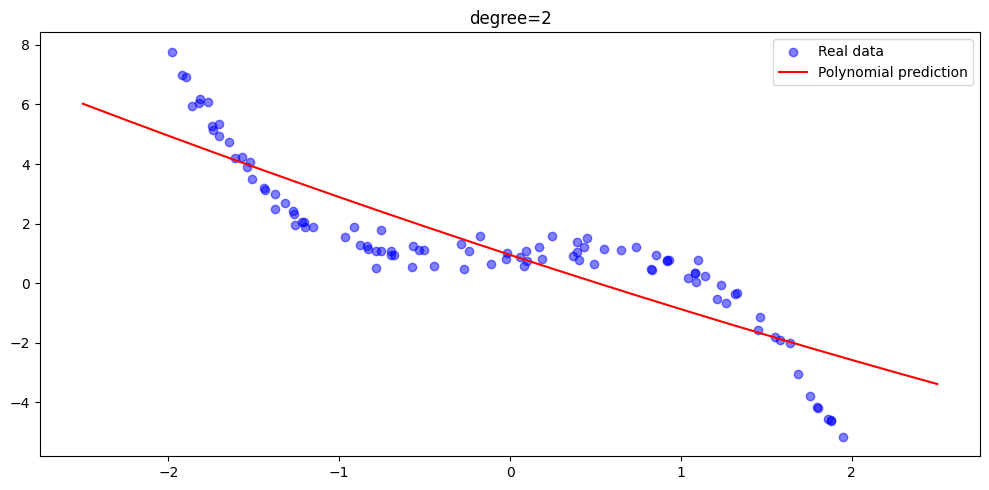

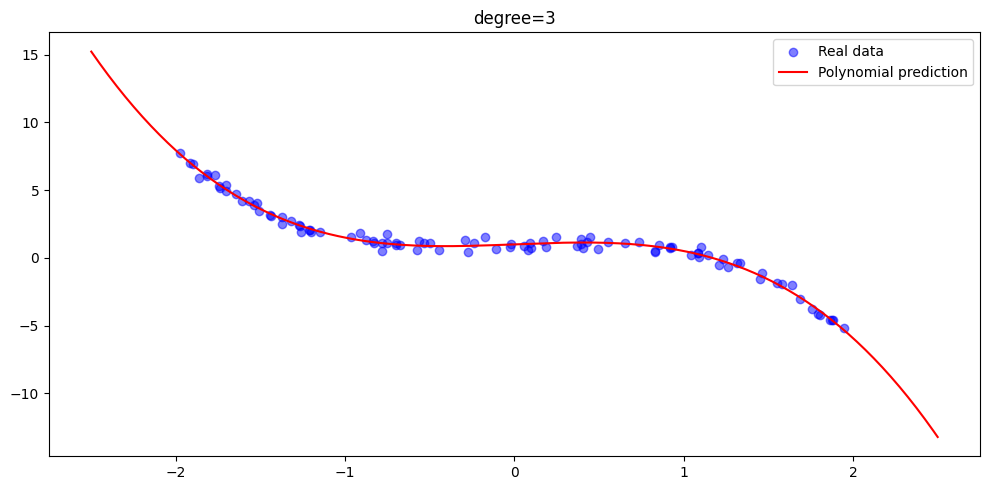

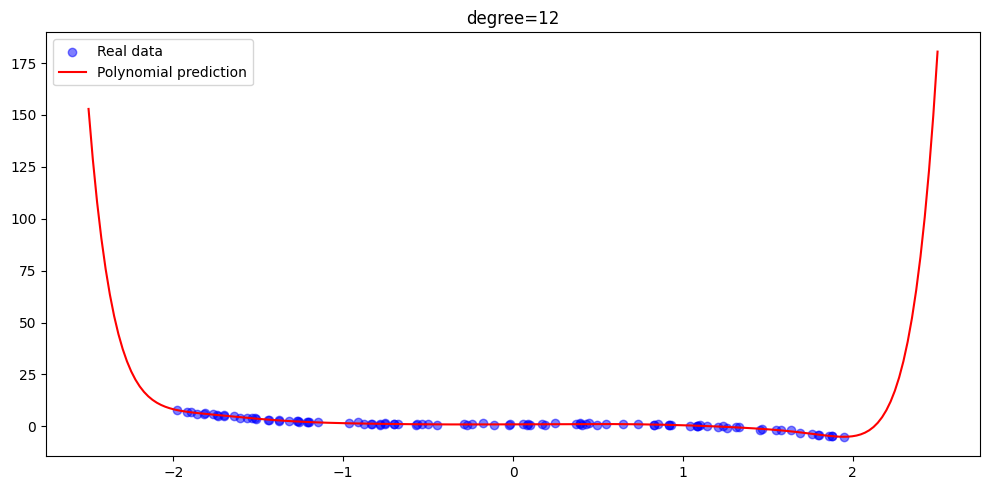

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Generate artificial non-linear data
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 4 - 2, axis=0)
y = 1 + 0.5 * X - X**3 + 0.3 * np.random.randn(100, 1)

# Degrees to test
degrees = [1, 2, 3, 12]

for degree in degrees:
    fig = plt.figure(figsize=(10, 5))
    # Create pipeline combining PolynomialFeatures and LinearRegression
    model = make_pipeline(
        PolynomialFeatures(degree=degree),
        LinearRegression()
    )
    model.fit(X, y)
    
    # Create smooth curve for plotting
    X_plot = np.linspace(-2.5, 2.5, 200).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    
    # Plot results
    plt.scatter(X, y, color='blue', alpha=0.5, label="Real data")
    plt.plot(X_plot, y_plot, color='red', label="Polynomial prediction")
    plt.title(f"degree={degree}")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


### What do we observe?

When the degree increases, the model is able to better capture complex data patterns. A degree of 1 or 2 clearly underfits the data, while higher degree 3 better adapts to the curvature, but beware of potential overfitting, which can be seen with degree 12.

---